# Assignment 1

## Data loading and preprocessing

In [128]:
# Import libraries
import pandas as pd
import kagglehub
import numpy as np
import seaborn as sns
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix # TODO: learn how to use these two functions
import matplotlib.pyplot as plt
import torchsummary
from torchsummary import summary

In [129]:
# Download training data

def load_data(path):
    df = pd.read_csv(path)
    return df
path = "./archive (2)/train.csv"
mobile_price_data = load_data(path=path)

### EDA

#### Battery power

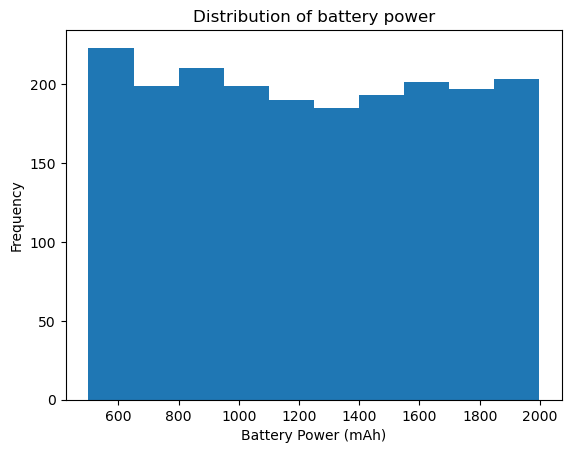

In [130]:
plt.hist(mobile_price_data['battery_power'])
plt.title(label="Distribution of battery power")
plt.xlabel("Battery Power (mAh)")
plt.ylabel("Frequency")
plt.show()

#### Price range

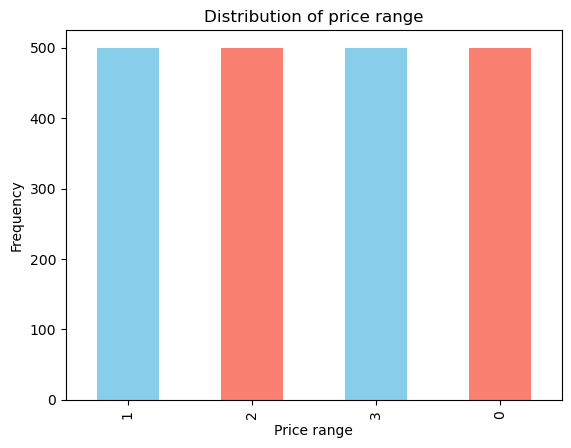

In [131]:
# Count the number of phones with and without Bluetooth
bluetooth_counts = mobile_price_data['price_range'].value_counts()

bluetooth_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title(label="Distribution of price range")
plt.xlabel("Price range")
plt.ylabel("Frequency")
plt.show()

#### Bluetooth

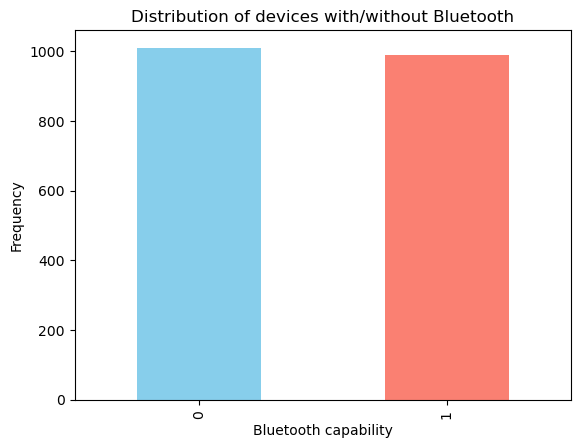

In [132]:
# Count the number of phones with and without Bluetooth
bluetooth_counts = mobile_price_data['blue'].value_counts()

bluetooth_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title(label="Distribution of devices with/without Bluetooth")
plt.xlabel("Bluetooth capability")
plt.ylabel("Frequency")
plt.show()

#### Battery power and price range

/var/folders/qb/nbt7_d1n11z21d0x2brxlbrm0000gn/T/ipykernel_99606/2505527726.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mobile_price_data, x='price_range', y='battery_power', palette='pastel')


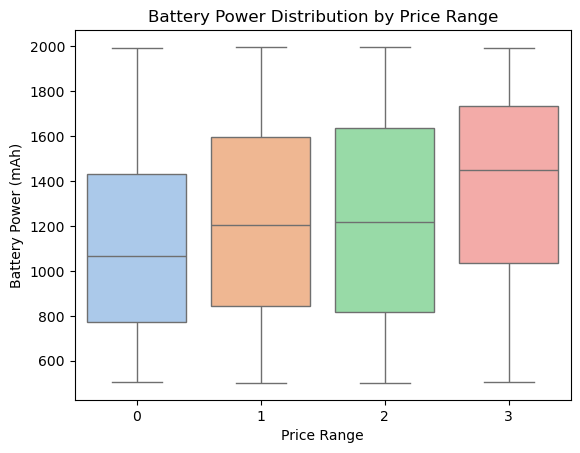

In [133]:
sns.boxplot(data=mobile_price_data, x='price_range', y='battery_power', palette='pastel')
plt.title('Battery Power Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Battery Power (mAh)')
plt.show()

Looks like on average, more expensive phones are associated with larger battery power

#### Number of cores processors and price range

/var/folders/qb/nbt7_d1n11z21d0x2brxlbrm0000gn/T/ipykernel_99606/3355788328.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mobile_price_data, x='price_range', y='n_cores', palette='pastel')


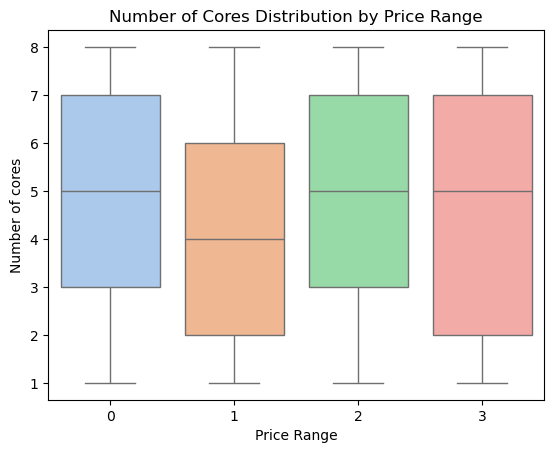

In [134]:
sns.boxplot(data=mobile_price_data, x='price_range', y='n_cores', palette='pastel')
plt.title('Number of Cores Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of cores')
plt.show()

Looks like on average, all phones have similar average number of cores of around 5 cores.

In [135]:
from scipy.stats import f_oneway

# Separate n_cores by price range
group1 = mobile_price_data[mobile_price_data['price_range'] == 1]['n_cores']
group2 = mobile_price_data[mobile_price_data['price_range'] == 2]['n_cores']
group3 = mobile_price_data[mobile_price_data['price_range'] == 3]['n_cores']

# Run one-way ANOVA
f_stat, p_value = f_oneway(group1, group2, group3)

print("F-statistic:", f_stat)
print("p-value:", p_value)

F-statistic: 3.517763228425036
p-value: 0.029911186668355575


There's a significant difference in number of cores for phones in different price ranges.

#### Talk time and price range

/var/folders/qb/nbt7_d1n11z21d0x2brxlbrm0000gn/T/ipykernel_99606/919201238.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mobile_price_data, x='price_range', y='talk_time', palette='pastel')


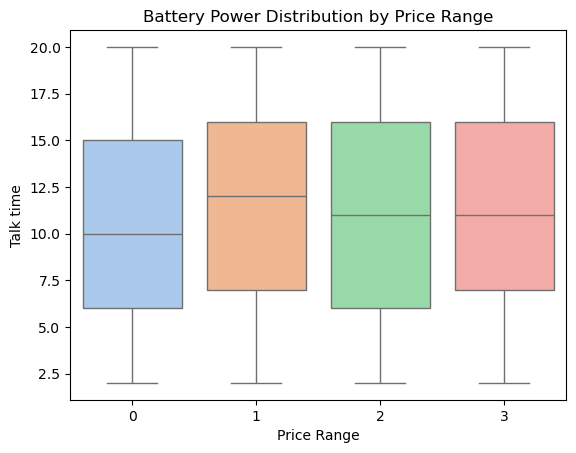

In [136]:
sns.boxplot(data=mobile_price_data, x='price_range', y='talk_time', palette='pastel')
plt.title('Battery Power Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Talk time')
plt.show()

In [137]:
from scipy.stats import f_oneway

# Separate talk time by price range
group1 = mobile_price_data[mobile_price_data['price_range'] == 1]['talk_time']
group2 = mobile_price_data[mobile_price_data['price_range'] == 2]['talk_time']
group3 = mobile_price_data[mobile_price_data['price_range'] == 3]['talk_time']

# Run one-way ANOVA
f_stat, p_value = f_oneway(group1, group2, group3)

print("F-statistic:", f_stat)
print("p-value:", p_value)

F-statistic: 0.6588900836733314
p-value: 0.5175753038992309


We can see that there's no significant difference in talk time between phones in different price ranges

#### Clock speed and price range

/var/folders/qb/nbt7_d1n11z21d0x2brxlbrm0000gn/T/ipykernel_99606/3351273110.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mobile_price_data, x='price_range', y='ram', palette='pastel')


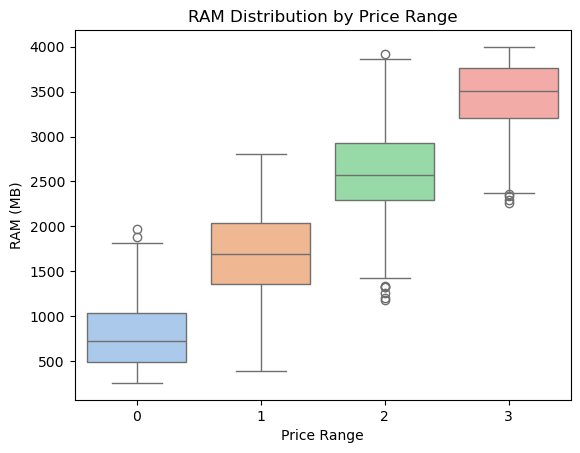

In [138]:
sns.boxplot(data=mobile_price_data, x='price_range', y='ram', palette='pastel')
plt.title('RAM Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('RAM (MB)')
plt.show()

We can see that more expensive devices tend to have higher RAM power.

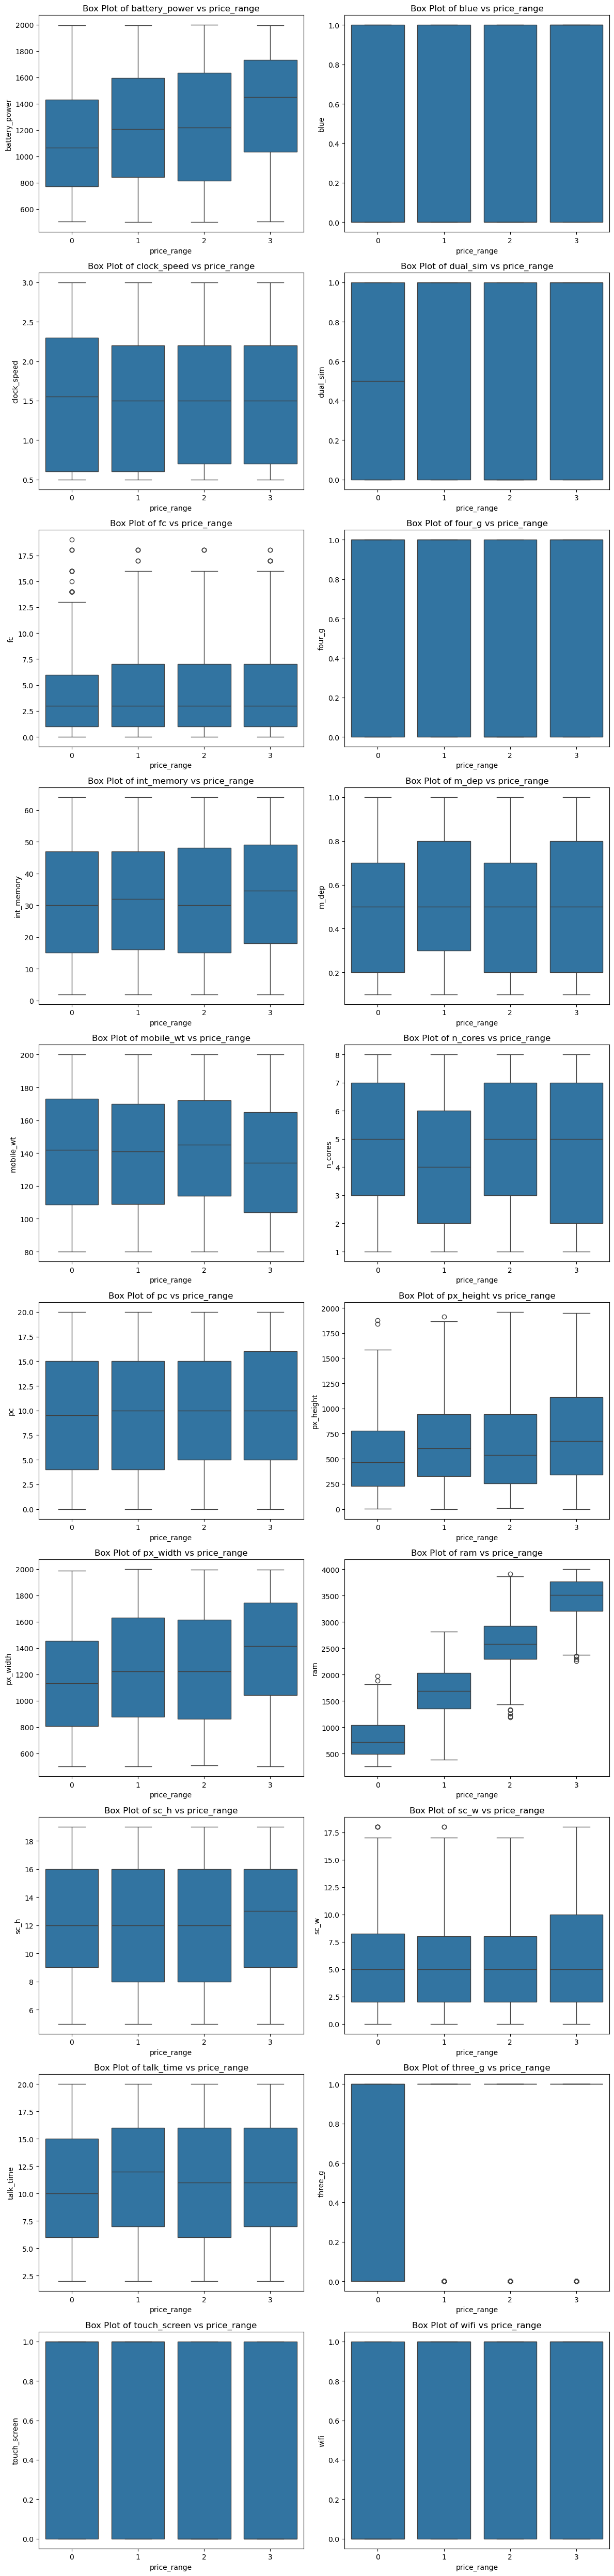

In [139]:
DataFeatures = mobile_price_data.drop(['price_range'], axis=1)
features_to_analyze = DataFeatures.columns
target_column_name = 'price_range'


n_features = len(features_to_analyze)
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(12, n_rows * 5))

for i, feature in enumerate(features_to_analyze):
    plt.subplot(n_rows, n_cols, i + 1)

    if mobile_price_data[feature].dtype == 'int64' or mobile_price_data[feature].dtype == 'float64':
        sns.boxplot(x=target_column_name, y=feature, data=mobile_price_data)
        plt.title(f'Box Plot of {feature} vs {target_column_name}')

    else:
        sns.countplot(x=feature, hue=target_column_name, data=mobile_price_data)
        plt.title(f'Count Plot of {feature} vs {target_column_name}')

plt.tight_layout()
plt.show()

#### Correlation matrix for all features --> Check for multicollinearity

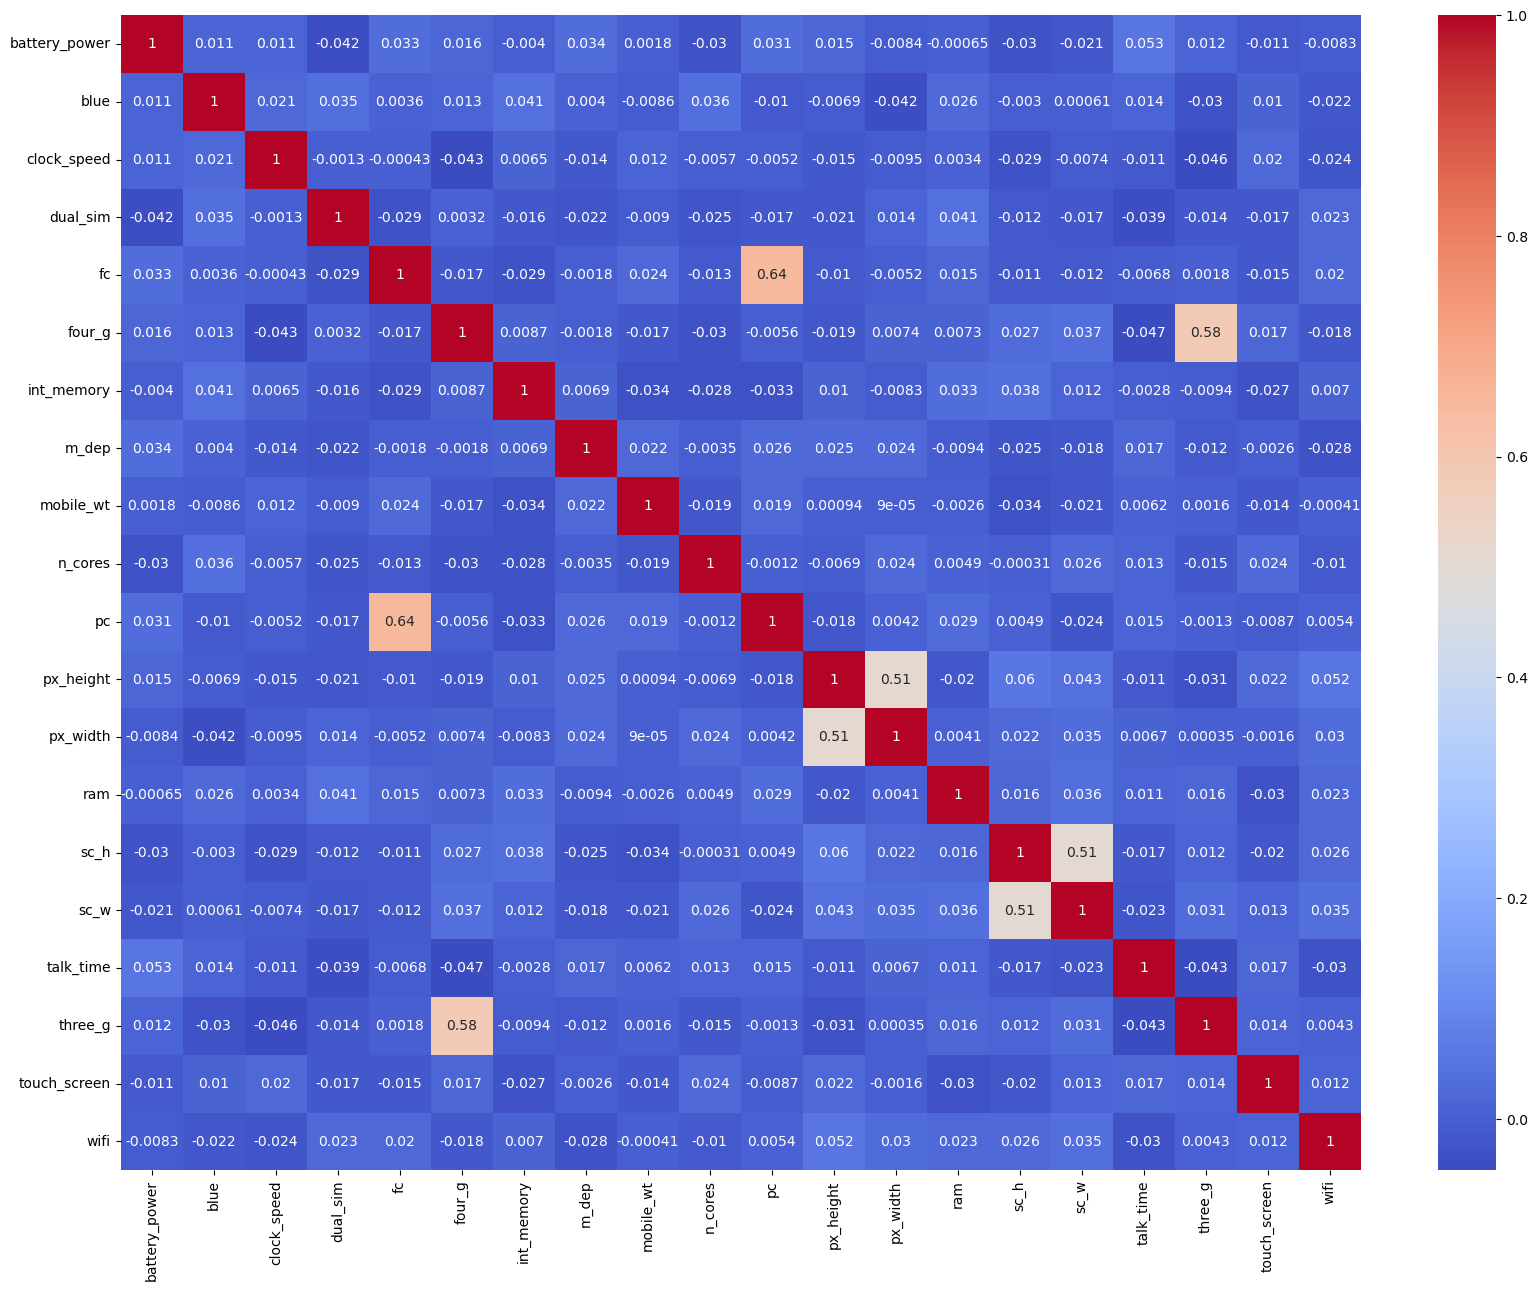

In [140]:
numeric_features = mobile_price_data.select_dtypes(include=['float64', 'int64']).drop(columns=['price_range'])
corr_matrix = numeric_features.corr()

plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

We can see that pc (primary camera in mega pixels) and fc (front camera in mega pixels) are strongly correlated.

Additionally, 4G and 3G status are also strongly correlated (i.e., a phone that has 4G is also compatible with 3G).

Lastly, a screen's width and height are strongly correlated, which makes sense.

In [141]:
mobile_price_data.loc[mobile_price_data['four_g'] == 1].shape

(1043, 21)

In [142]:
mobile_price_data.loc[(mobile_price_data['four_g'] == 1) & (mobile_price_data['three_g'] == 1)].shape

(1043, 21)

We can confirm that a 4G phone is backwards compatible with 3G.

### Pre-process data

Let's see if our data has any missing values

In [143]:
mobile_price_data.isna().sum().sum()

0

In [144]:
mobile_price_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

There are none so let's standardize our data so that every feature is on the same scale

In [188]:
def standardize_dataset(df, scaler):
    df_standardized = scaler.fit_transform(df) # standardize our dataset to follow a normal distribution

    df_standardized = pd.DataFrame(df_standardized, columns=df.columns) # Keep the column names
    return df_standardized

def feature_processing(df):
    # Remove redundant columns + features that have even distribution across price range (i.e., there's no difference across price ranges)
    # cleaned_df = df.drop(['px_height', 'px_width', 'sc_w', 'sc_h', 'three_g', 'touch_screen', 'wifi', 'dual_sim', 'blue', 'talk_time', 'pc'], axis=1)
    cleaned_df = df.drop(['three_g', 'touch_screen', 'wifi', 'dual_sim', 'blue', 'talk_time', 'pc'], axis=1)
    
    return cleaned_df

## MLP model code

In [229]:
class MLPClassifier(nn.Module):
    # def __init__(self, input_dim, hidden_dims=[512, 256, 128, 64, 32], output_dim=4):
    #     super(MLPClassifier, self).__init__()
    #     self.model = nn.Sequential(
    #         nn.Linear(input_dim, hidden_dims[0]), # (input_dim, 512)
    #         # nn.ReLU(),
    #         nn.LeakyReLU(0.01),
    #         nn.Dropout(0.4),
    #         nn.Linear(hidden_dims[0], hidden_dims[1]), # (512, 256)
    #         # nn.ReLU(),
    #         nn.LeakyReLU(0.01),
    #         nn.Dropout(0.4),
    #         nn.Linear(hidden_dims[1], hidden_dims[2]), # (256, 128)
    #         # nn.ReLU(),
    #         nn.LeakyReLU(0.01),
    #         nn.Dropout(0.4),
    #         nn.Linear(hidden_dims[2], hidden_dims[3]), # (128, 64)
    #         # nn.ReLU(),
    #         nn.LeakyReLU(0.01),
    #         nn.Dropout(0.4),
    #         nn.Linear(hidden_dims[3], hidden_dims[4]), # (64, 32)
    #         # nn.ReLU(),
    #         nn.LeakyReLU(0.01),
    #         nn.Dropout(0.4),
    #         nn.Linear(hidden_dims[4], output_dim) # Do not apply softmax here!!! # (32, 4)
    # )
    def __init__(self, input_dim, hidden_dims=[256, 128, 64, 32], output_dim=4):
        super(MLPClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dims[0]), # (input_dim, 256)
            nn.BatchNorm1d(hidden_dims[0]),
            nn.ReLU(),
            # nn.LeakyReLU(0.01),
            nn.Dropout(0.4),
            nn.Linear(hidden_dims[0], hidden_dims[1]), # (256, 128)
            nn.BatchNorm1d(hidden_dims[1]),
            nn.ReLU(),
            # nn.LeakyReLU(0.01),
            nn.Dropout(0.4),
            nn.Linear(hidden_dims[1], hidden_dims[2]), # (128, 64)
            nn.BatchNorm1d(hidden_dims[2]),
            nn.ReLU(),
            # nn.LeakyReLU(0.01),
            nn.Dropout(0.4),
            nn.Linear(hidden_dims[2], hidden_dims[3]), # (64, 32)
            nn.BatchNorm1d(hidden_dims[3]),
            nn.ReLU(),
            # nn.LeakyReLU(0.01),
            nn.Dropout(0.4),
            nn.Linear(hidden_dims[3], output_dim) # (32, 4)
        )
        # Initialize weights
        self._initialize_weights()



    def _initialize_weights(self):
        """Initialize weights using Xavier/Glorot initialization for ReLU activation"""
        for module in self.modules():
            if isinstance(module, nn.Linear):
                # Xavier/Glorot initialization for linear layers
                nn.init.xavier_uniform_(module.weight)
                if module.bias is not None:
                    nn.init.constant_(module.bias, 0)
            elif isinstance(module, nn.BatchNorm1d):
                # Initialize batch norm parameters
                nn.init.constant_(module.weight, 1)
                nn.init.constant_(module.bias, 0)

    # def _initialize_weights(self):
    #     """Initialize weights using Kaiming initialization for ReLU activation"""
    #     for module in self.modules():
    #         if isinstance(module, nn.Linear):
    #             nn.init.kaiming_uniform_(module.weight)
    #             if module.bias is not None:
    #                 nn.init.constant_(module.bias, 0)
    #         elif isinstance(module, nn.BatchNorm1d):
    #             nn.init.constant_(module.weight, 1)
    #             nn.init.constant_(module.bias, 0)
    
    # def __init__(self, input_dim, hidden_dims=[128, 64, 32], output_dim=4):
    #     super(MLPClassifier, self).__init__()
    #     self.model = nn.Sequential(
    #         nn.Linear(input_dim, hidden_dims[0]), # (input_dim, 128)
    #         # nn.ReLU(),
    #         nn.LeakyReLU(0.01),
    #         nn.Dropout(0.3),
    #         nn.Linear(hidden_dims[0], hidden_dims[1]), # (128, 64)
    #         # nn.ReLU(),
    #         nn.LeakyReLU(0.01),
    #         nn.Dropout(0.3),
    #         # nn.LeakyReLU(0.01),
    #         nn.Linear(hidden_dims[1], hidden_dims[2]), # (64, 32)
    #         # nn.ReLU(),
    #         nn.LeakyReLU(0.01),
    #         nn.Dropout(0.3),
    #         # nn.LeakyReLU(0.01),
    #         nn.Linear(hidden_dims[2], output_dim) # Do not apply softmax here!!! # (32, 4)
    #     )
    # def __init__(self, input_dim, hidden_dims=[64, 32], output_dim=4):
    #     super(MLPClassifier, self).__init__()
    #     self.model = nn.Sequential(
    #         nn.Linear(input_dim, hidden_dims[0]), # (input_dim, 64)
    #         # nn.ReLU(),
    #         nn.LeakyReLU(0.01),
    #         nn.Dropout(0.3),
    #         nn.Linear(hidden_dims[0], hidden_dims[1]), # (64, 32)
    #         # nn.ReLU(),
    #         nn.LeakyReLU(0.01),
    #         nn.Dropout(0.3),
    #         nn.Linear(hidden_dims[1], output_dim) # Do not apply softmax here!!! # (32, 4)
    #     )
    def forward(self, x):
        return self.model(x)

## Training and validation loop



In [147]:
def plot_learning_curves(train_losses, val_losses, train_accuracies, val_accuracies):
    # TODO: Use this function to plot learning curve
    """Plot learning curves for loss and accuracy"""
    import matplotlib.pyplot as plt
    
    epochs = range(1, len(train_losses) + 1)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot losses
    ax1.plot(epochs, train_losses, 'b-', label='Training Loss', linewidth=2)
    ax1.plot(epochs, val_losses, 'r-', label='Validation Loss', linewidth=2)
    ax1.set_title('Training and Validation Loss', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Epoch', fontsize=12)
    ax1.set_ylabel('Loss', fontsize=12)
    ax1.legend(fontsize=12)
    ax1.grid(True, alpha=0.3)
    
    # Plot accuracies
    ax2.plot(epochs, train_accuracies, 'b-', label='Training Accuracy', linewidth=2)
    ax2.plot(epochs, val_accuracies, 'r-', label='Validation Accuracy', linewidth=2)
    ax2.set_title('Training and Validation Accuracy', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Epoch', fontsize=12)
    ax2.set_ylabel('Accuracy (%)', fontsize=12)
    ax2.legend(fontsize=12)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

In [148]:
class MobilePriceDataset(Dataset):
    """
    You can directly use this function, we will discuss more about this function in Assignment 2.
    """
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [225]:
def train_evaluate(path, epoch, early_stopping):
    # Load training data
    df = load_data(path)
    # split data, train_df is your train data.
    train_df, test_df = train_test_split(df, test_size=0.15, random_state=1)

    # Preprocess train and test df 
    cleaned_train_df = feature_processing(train_df)
    cleaned_test_df = feature_processing(test_df)

    # Split features and labels (train_df)
    X = cleaned_train_df.drop("price_range", axis=1)
    y = cleaned_train_df["price_range"]

    # Split features and labels (test_df)
    X_test = cleaned_test_df.drop("price_range", axis=1)
    y_test = cleaned_test_df["price_range"]

    # Initialize a scaler for both the test and train data
    scaler = StandardScaler()
    scaler.fit(train_df)

    # Scale X and X_test
    X = standardize_dataset(X, scaler=scaler)
    X_test = standardize_dataset(X_test, scaler=scaler)


    # TODO: Train/val split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1) # 80% is train and 20% is validation
    # X_train, X_test, y_train, y_test 
    # https://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.train_test_split.html
    

    # Prepare datasets and loaders
    train_dataset = MobilePriceDataset(X_train, y_train)
    val_dataset = MobilePriceDataset(X_val, y_val)


    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

    # Define model
    model = MLPClassifier(input_dim=X.shape[1])

    # Move model to device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    # For Mac M-series chips, you can also try:
    device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
    print(f"Using device: {device}")

    model = model.to(device)

    # Here is a basic training loop
    # Training setup
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4) # You can play with different optimizer
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=20, factor=0.5)
    
    # Training parameters
    num_epochs = epoch # You can change this number

    # The following three lines are related to early stop
    early_stop_patience = early_stopping 
    best_val_loss = float('inf')
    patience_counter = 0
    #########################################################
    
    # Lists to store metrics for learning curves
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    
    print(f"Training on device: {device}")
    print(f"Model has {sum(p.numel() for p in model.parameters())} parameters")
    
    # Training loop
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0
        
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device) # move data to gpu
            
            # Zero gradients before every batch
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(data)
            loss = criterion(outputs, target)
            
            # Backward pass
            loss.backward()
            optimizer.step()
            
            # Statistics
            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            train_total += target.size(0)
            train_correct += (predicted == target).sum().item()
        
        # Calculate training metrics
        avg_train_loss = train_loss / len(train_loader)
        train_accuracy = 100 * train_correct / train_total
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            for data, target in val_loader:
                data, target = data.to(device), target.to(device)
                outputs = model(data)
                loss = criterion(outputs, target)
                
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1) # convert proability to 0/1 label
                val_total += target.size(0)
                val_correct += (predicted == target).sum().item()
        
        # Calculate validation metrics
        avg_val_loss = val_loss / len(val_loader)
        val_accuracy = 100 * val_correct / val_total
        
        # Store metrics for learning curves
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        
        # TODO: Learning rate scheduling
        # After each epoch, scheduler updates the learning rate
        scheduler.step(val_loss)
        
        print(f"Epoch {epoch+1}, LR: {scheduler.get_last_lr()}")
        
        # Print progress
        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}]')
            print(f'Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.2f}%')
            print(f'Val Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.2f}%')
            print(f'LR: {optimizer.param_groups[0]["lr"]:.6f}')
            print('-' * 50)

        if early_stopping > 0:
            # TODO: Early stopping
            # Stop training if the model's avg_val_loss doesn't improve for 20 epochs
            if avg_val_loss <= best_val_loss:
                # reset the patience counter
                patience_counter = 0
                best_val_loss = avg_val_loss
                # TODO: save best model
                torch.save(model.state_dict(), "best_model.pt") # save the best model's weights because the model is improving
            else:
                patience_counter += 1 # increase the counter becuse the model's avg_val_loss isn't improving
                if patience_counter >= early_stop_patience:
                    print(f"Early stopping at {epoch + 1}")
                    # Restore the best model's weights because this model's weights are bad since its avg_val_loss isn't improving
                    model.load_state_dict(torch.load("best_model.pt"))
                    break 
        else:
            torch.save(model.state_dict(), "best_model.pt") # save the best model's weights because the model is improving

    plot_learning_curves(train_losses, val_losses, train_accuracies, val_accuracies)
    return model, X_test, y_test

## Evaluation metrics and learning curves

## Final prediction function



In [150]:
def predict(model, X_test_loader, device):
        """
        Evaluate model on test data and return comprehensive metrics
        """
        model.eval()
        correct = 0
        total = 0
        all_predictions = []
        all_targets = []
        
        with torch.no_grad():
            for data, target in X_test_loader:
                data = data.to(device)
                target = target.to(device)
                outputs = model(data)
                _, predicted = torch.max(outputs.data, 1)
                total += target.size(0)
                correct += (predicted == target).sum().item()
                
                all_predictions.extend(predicted.cpu().numpy())
                all_targets.extend(target.cpu().numpy())
        
        accuracy = 100 * correct / total
        
        # TODO: Add more evaluation metrics
        # Hint: Use classification_report, confusion_matrix from sklearn.metrics
        # Print or return precision, recall, F1-score for each class
        print("Classification Report:")
        print(classification_report(all_targets, all_predictions, zero_division=0))
        
        print("Confusion Matrix:")
        print(confusion_matrix(all_targets, all_predictions))
        
        return accuracy

Model architecture:
1. 256-128-64-32 hidden layers
2. Dropout (0.4)
3. L2 regularization
4. ReLU
5. Optimizer = Adagrad

Using device: mps
Training on device: mps
Model has 47908 parameters
Epoch 1, LR: [0.001]
Epoch [1/1000]
Train Loss: 1.7063, Train Acc: 27.43%
Val Loss: 1.2785, Val Acc: 44.41%
LR: 0.001000
--------------------------------------------------
Epoch 2, LR: [0.001]
Epoch 3, LR: [0.001]
Epoch 4, LR: [0.001]
Epoch 5, LR: [0.001]
Epoch 6, LR: [0.001]
Epoch 7, LR: [0.001]
Epoch 8, LR: [0.001]
Epoch 9, LR: [0.001]
Epoch 10, LR: [0.001]
Epoch [10/1000]
Train Loss: 0.7583, Train Acc: 68.90%
Val Loss: 0.5154, Val Acc: 86.47%
LR: 0.001000
--------------------------------------------------
Epoch 11, LR: [0.001]
Epoch 12, LR: [0.001]
Epoch 13, LR: [0.001]
Epoch 14, LR: [0.001]
Epoch 15, LR: [0.001]
Epoch 16, LR: [0.001]
Epoch 17, LR: [0.001]
Epoch 18, LR: [0.001]
Epoch 19, LR: [0.001]
Epoch 20, LR: [0.001]
Epoch [20/1000]
Train Loss: 0.4778, Train Acc: 81.03%
Val Loss: 0.2857, Val Acc: 92.94%
LR: 0.001000
--------------------------------------------------
Epoch 21, LR: [0.001]
Epoch 22, LR: [0.001]
E

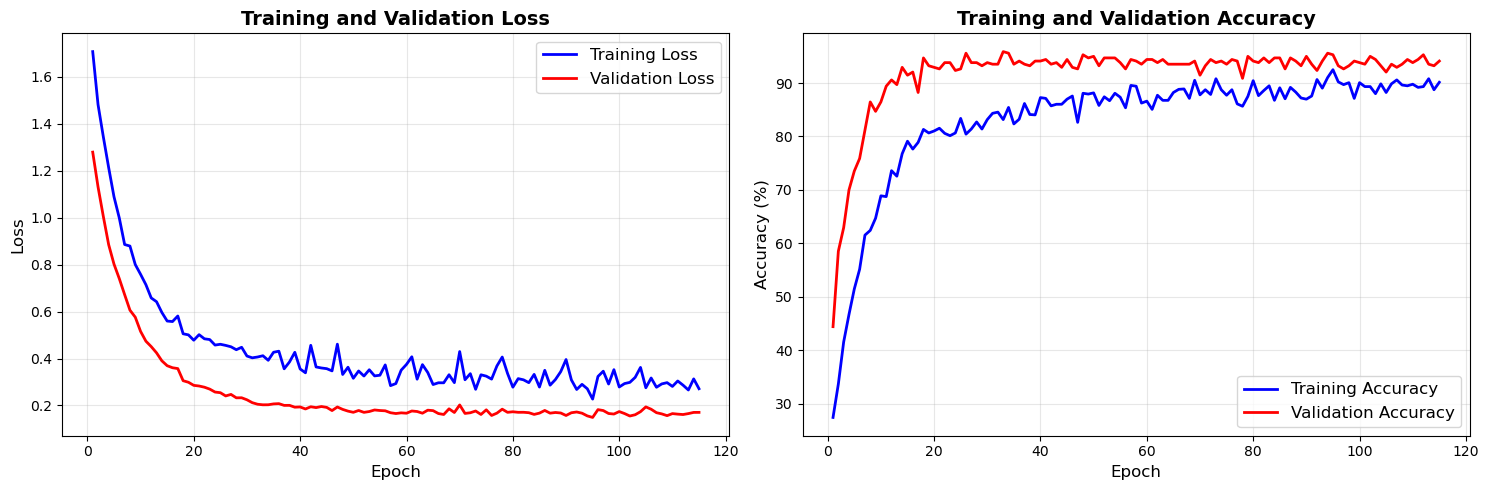

Using device: mps
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       0.94      0.89      0.92        75
           2       0.93      0.86      0.89        78
           3       0.91      0.97      0.94        75

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

Confusion Matrix:
[[72  0  0  0]
 [ 5 67  3  0]
 [ 0  4 67  7]
 [ 0  0  2 73]]
Accuracy on test data: 93.0


In [230]:
# load the best model
model, X_test, y_test = train_evaluate(path="./archive (2)/train.csv",
                                              epoch=1000,
                                              early_stopping=20)

model.load_state_dict(torch.load('best_model.pt'))


# Create a dataset with class MobilePriceDataset
test_dataset = MobilePriceDataset(X_test, y_test)

# Create DataLoader that accepts MobilePriceDataset
Test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Move model to device
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

model = model.to(device)

# Generate prediction and classification report
accuracy = predict(model, Test_loader, device=device)

print(f"Accuracy on test data: {accuracy}")